In [1]:
import pandas as pd

In [2]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
teams = pd.read_csv('MTeams.csv')
team_dict = dict([[r['TeamID'], r['TeamName']] for i,r in teams.iterrows()])

In [3]:
df = pd.read_csv('MRegularSeasonDetailedResults.csv')
df = df[df.Season == 2022]

In [4]:
df.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [5]:
ids = pd.concat([df.WTeamID, df.LTeamID]).unique()
ids.sort()
len(ids)

358

In [ ]:
['FGM', 'FGA', 'FGM3', 'FGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']

In [67]:
def get_stats(team_id):
    win_df = df[df.WTeamID == team_id]
    lose_df = df[df.LTeamID == team_id]
    n = len(win_df) + len(lose_df)
    
    win_percentage = 100*len(win_df)/n
    
    # points per game
    win_points = win_df.WScore.sum()
    lose_points = lose_df.LScore.sum()
    points_per_game = (win_points+lose_points)/n
    
    # field goal percentage
    win_fgm = win_df.WFGM.sum()
    win_fga = win_df.WFGA.sum()
    lose_fgm = lose_df.LFGM.sum()
    lose_fga = lose_df.LFGA.sum()
    field_goal_percentage = 100*(win_fgm + lose_fgm)/(win_fga + lose_fga)

    # free throw percentage
    win_ftm = win_df.WFTM.sum()
    win_fta = win_df.WFTA.sum()
    lose_ftm = lose_df.LFTM.sum()
    lose_fta = lose_df.LFTA.sum()
    free_throw_percentage = 100*(win_ftm + lose_ftm)/(win_fta + lose_fta)

    # Three point percentage
    win_3sm = win_df.WFGM3.sum()
    win_3sa = win_df.WFGA3.sum()
    lose_3sm = lose_df.LFGM3.sum()
    lose_3sa = lose_df.LFGA3.sum()
    three_point_percentage = 100*(win_3sm + lose_3sm)/(win_3sa + lose_3sa)

    # Assists per game
    win_assists = win_df.WAst.sum()
    lose_assists = lose_df.LAst.sum()
    assists_per_game = (win_assists + lose_assists)/n

    # Rebounds per game
    win_orb = win_df.WOR.sum()
    lose_orb = lose_df.LOR.sum()
    rebounds_per_game =  (win_orb + lose_orb)/n


    # Opponents points per game
    opp_win_points = win_df.LScore.sum()
    opp_lose_points = lose_df.WScore.sum()
    opp_points_per_game = (opp_win_points+opp_lose_points)/n
    
    # Opponents field goal percentage
    opp_win_fgm = win_df.LFGM.sum()
    opp_win_fga = win_df.LFGA.sum()
    opp_lose_fgm = lose_df.WFGM.sum()
    opp_lose_fga = lose_df.WFGA.sum()
    opp_field_goal_percentage = 100*(opp_win_fgm + opp_lose_fgm)/(opp_win_fga + opp_lose_fga)

    # Opponents free throw percentage
    opp_win_ftm = win_df.LFTM.sum()
    opp_win_fta = win_df.LFTA.sum()
    opp_lose_ftm = lose_df.WFTM.sum()
    opp_lose_fta = lose_df.WFTA.sum()
    opp_free_throw_percentage = 100*(opp_win_ftm + opp_lose_ftm)/(opp_win_fta + opp_lose_fta)

    # Opponents three point percentage
    opp_win_3sm = win_df.LFGM3.sum()
    opp_win_3sa = win_df.LFGA3.sum()
    opp_lose_3sm = lose_df.WFGM3.sum()
    opp_lose_3sa = lose_df.WFGA3.sum()
    opp_three_point_percentage = 100*(opp_win_3sm + opp_lose_3sm)/(opp_win_3sa + opp_lose_3sa)

    # Opponents assists per game
    opp_win_assists = win_df.LAst.sum()
    opp_lose_assists = lose_df.WAst.sum()
    opp_assists_per_game = (opp_win_assists + opp_lose_assists)/n

    # Opponents rebounds per game
    opp_win_orb = win_df.LOR.sum()
    opp_lose_orb = lose_df.WOR.sum()
    opp_rebounds_per_game =  (opp_win_orb + opp_lose_orb)/n
    
    
    # Rebound margin
    rebound_margin = rebounds_per_game - opp_rebounds_per_game
    
    return {
        'team': team_dict[team_id],
        'win_percentage': win_percentage,
        
        'points_per_game': points_per_game,
        'field_goal_percentage': field_goal_percentage,
        'three_point_percentage': three_point_percentage,
        'free_throw_percentage': free_throw_percentage,
        'assists_per_game': assists_per_game,
        'rebounds_per_game': rebounds_per_game,
        
        'opp_points_per_game': opp_points_per_game,
        'opp_field_goal_percentage': opp_field_goal_percentage,
        'opp_three_point_percentage': opp_three_point_percentage,
        'opp_free_throw_percentage': opp_free_throw_percentage,
        'opp_assists_per_game': opp_assists_per_game,
        'opp_rebounds_per_game': opp_rebounds_per_game,
        
        'rebound_margin': rebound_margin
    }

In [69]:
stats_df.to_csv('NCAABasketballStats2022.csv', index=False)

In [68]:
stats_df = pd.DataFrame([get_stats(team_id) for team_id in ids])
stats_df

team  win_percentage  points_per_game  field_goal_percentage  \
0     Abilene Chr       65.517241        73.172414              42.154567   
1       Air Force       37.931034        59.034483              43.632568   
2           Akron       70.967742        69.290323              45.375543   
3         Alabama       59.375000        79.968750              44.073705   
4     Alabama A&M       40.000000        61.433333              37.875289   
..            ...             ...              ...                    ...   
353    Bellarmine       55.172414        67.965517              46.158651   
354      Dixie St       33.333333        68.074074              41.001267   
355   Tarleton St       39.285714        63.142857              41.455274   
356  UC San Diego       40.740741        68.370370              43.741307   
357  St Thomas MN       25.925926        72.666667              43.453865   

     three_point_percentage  free_throw_percentage  assists_per_game  \
0                 31.391586              74.277017         14.068966   
1                 33.280000              64.935065         12.482759   
2                 35.565476              69.195046         11.516129   
3                 30.841121              72.997033         14.625000   
4                 27.083333              71.256454          9.500000   
..                      ...                    ...               ...   
353               34.179104              75.000000         13.344828   
354               29.541596              66.666667         14.407407   
355               30.916844              75.445545         10.464286   
356               35.963581              74.680851         13.185185   
357               34.375000              77.105263         11.481481   

     rebounds_per_game  opp_points_per_game  opp_field_goal_percentage  \
0             8.758621            68.413793                  44.444444   
1             4.896552            66.034483                  46.297578   
2             7.870968            64.161290                  43.201883   
3            11.625000            76.406250                  43.465046   
4             9.466667            67.000000                  40.089336   
..                 ...                  ...                        ...   
353           6.137931            70.448276                  46.148950   
354           8.481481            76.074074                  44.798557   
355           7.464286            65.821429                  45.320197   
356           4.740741            71.629630                  47.342089   
357           5.962963            78.222222                  50.838364   

     opp_three_point_percentage  opp_free_throw_percentage  \
0                     34.325744                  72.261735   
1                     31.185031                  75.978648   
2                     34.840871                  70.179372   
3                     33.145275                  71.181556   
4                     32.040230                  68.421053   
..                          ...                        ...   
353                   35.000000                  70.464135   
354                   33.006536                  70.980392   
355                   32.896890                  69.960474   
356                   32.882012                  71.225071   
357                   40.100671                  73.760331   

     opp_assists_per_game  opp_rebounds_per_game  rebound_margin  
0               11.344828               8.413793        0.344828  
1               10.896552               7.758621       -2.862069  
2                9.548387               7.451613        0.419355  
3               12.375000              10.312500        1.312500  
4               13.500000               9.800000       -0.333333  
..                    ...                    ...             ...  
353             13.103448               8.551724       -2.413793  
354             14.888889               9.407407     

In [41]:
def win_percentage(team_id):
    wins = len(df[df.WTeamID == team_id])
    losses = len(df[df.LTeamID == team_id])
    return wins/(wins+losses)
def points_per_game(team_id):
    win_df = 
    win_points = df[df.WTeamID == team_id].WScore.sum()
    lose_points = df[df.LTeamID == team_id].LScore.sum()
    return (win_points + lose_points)/(len(win_points) + len(lose_points))
def threes_made(team_id):
    win_threes = df[df.WTeamID == team_id].WFGM3.sum()
    lose_threes = df[df.LTeamID == team_id].LFGM3.sum()
    return win_threes + win_threes
def fg_percentage(team_id):
    win_fgm = df[df.WTeamID == team_id].WFGM.sum()
    win_fga = df[df.WTeamID == team_id].WFGA.sum()
    lose_fgm = df[df.LTeamID == team_id].LFGM.sum()
    lose_fga = df[df.LTeamID == team_id].LFGA.sum()
    fg_perc = (win_fgm + lose_fgm)/(win_fga + lose_fga)
    return fg_perc
def ft_percentage(team_id):
    win_ftm = df[df.WTeamID == team_id].WFTM.sum()
    win_fta = df[df.WTeamID == team_id].WFTA.sum()
    lose_ftm = df[df.LTeamID == team_id].LFTM.sum()
    lose_fta = df[df.LTeamID == team_id].LFTA.sum()
    ft_perc = (win_ftm + lose_ftm)/(win_fta + lose_fta)
    return ft_perc
def three_point_percentage(team_id):
    win_3sm = df[df.WTeamID == team_id].WFGM3.sum()
    win_3sa = df[df.WTeamID == team_id].WFGA3.sum()
    lose_3sm = df[df.LTeamID == team_id].LFGM3.sum()
    lose_3sa = df[df.LTeamID == team_id].LFGA3.sum()
    three_perc = (win_3sm + lose_3sm)/(win_3sa + lose_3sa)
    return three_perc
def assists_per_game(team_id):
    win_df = df[df.WTeamID == team_id]
    lose_df = df[df.LTeamID == team_id]
    win_assists = win_df.WAst.sum()
    lose_assists = lose_df.LAst.sum()
    return (win_assists + lose_assists)/(len(win_df) + len(lose_df))
def rebounds_per_game(team_id):
    win_df = df[df.WTeamID == team_id]
    lose_df = df[df.LTeamID == team_id]
    win_orb = win_df.WOR.sum()
    lose_orb = lose_df.LOR.sum()
    return (win_orb + lose_orb)/(len(win_df) + len(lose_df))

def opp_points_per_game(team_id):
    win_points = df[df.WTeamID == team_id].LScore.sum()
    lose_points = df[df.LTeamID == team_id].WScore.sum()
    return (win_points + lose_points)/(len(win_points) + len(lose_points))

# def avg_rebound_margin(team_id):
#     win_df = df[df.WTeamID == team_id]
#     win_orb = win_df.WOR.sum()
#     win_drb = win_df.WDR.sum()
#     opp_win_orb = win_df.LOR.sum()
#     opp_lose_drb = win_df.LDR.sum()
#     lose_df = df[df.LTeamID == team_id]
#     lose_orb = lose_df.WOR.sum()
#     lose_drb = lose_df.WDR.sum()
#     opp_lose_orb = lose_df.LOR.sum()
#     opp_lose_drb = lose_df.LDR.sum()
#     team_total_rebounds = win_orb + win_drb + lose_orb + lose_drb
#     opp_total_rebounds = opp_win_orb + opp_lose_drb + opp_lose_orb + opp_lose_drb
#     n = len(win_df) + len(lose_df)
#     return (team_total_rebounds - opp_total_rebounds)/n

In [42]:
data = pd.DataFrame([{
  # 'team_id': team_id,
  'team': team_dict[team_id],
  'win_percentage': win_percentage(team_id), 
  'fg_percentage': fg_percentage(team_id),
  'three_point_percentage': three_point_percentage(team_id),
  'ft_percentage': ft_percentage(team_id),
  'assists_per_game': assists_per_game(team_id), 
  'rebounds_per_game': rebounds_per_game(team_id),
  # 'threes_made': threes_made(team_id), 
  # 'points_scored': points_scored(team_id),
  # 'avg_rebound_margin': avg_rebound_margin(team_id),
  } for team_id in ids])
data = data.sort_values('team')

In [110]:
data.to_csv('NCAABasketballWinsVsPoints2022.csv', index=False)

In [43]:
data

team  win_percentage  fg_percentage  three_point_percentage  \
0      Abilene Chr        0.655172       0.421546                0.313916   
1        Air Force        0.379310       0.436326                0.332800   
2            Akron        0.709677       0.453755                0.355655   
3          Alabama        0.593750       0.440737                0.308411   
4      Alabama A&M        0.400000       0.378753                0.270833   
..             ...             ...            ...                     ...   
345      Wright St        0.606061       0.466495                0.330159   
346        Wyoming        0.750000       0.455066                0.330137   
347         Xavier        0.580645       0.446213                0.324615   
348           Yale        0.620690       0.441194                0.328947   
349  Youngstown St        0.533333       0.445608                0.345345   

     ft_percentage  assists_per_game  rebounds_per_game  
0         0.742770         14.068966           8.758621  
1         0.649351         12.482759           4.896552  
2         0.691950         11.516129           7.870968  
3         0.729970         14.625000          11.625000  
4         0.712565          9.500000           9.466667  
..             ...               ...                ...  
345       0.766169         13.787879           8.969697  
346       0.724884         10.875000           6.906250  
347       0.701079         14.516129           8.935484  
348       0.737226         11.827586           7.517241  
349       0.760784         11.666667           8.733333  

[358 rows x 7 columns]

<Axes: ylabel='Frequency'>

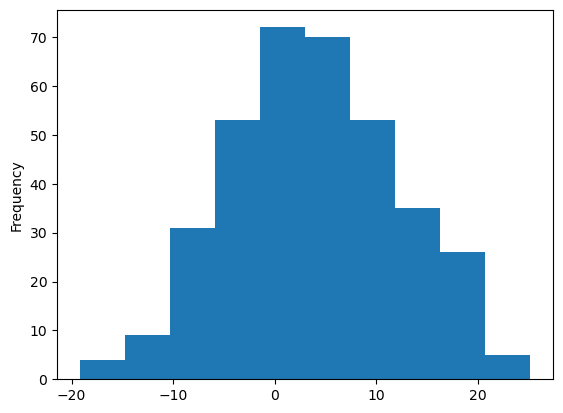

In [16]:
data.avg_rebound_margin.plot(kind="hist")